# ResNet20 Models

### Found in

<pre>
distiller/examples/ssl/checkpoints/
</pre>


See also: https://nervanasystems.github.io/distiller/model_zoo.html#distiller-model-zoo

We examine 3 sets of pretrained models

    - 4D_regularized_5Lremoved.pth.tar
    - 4D_regularized_5Lremoved_finetuned.pth.tar
    
    - channel_regularized_resnet20.pth.tar
    - channel_regularized_resnet20_finetuned.pth.tar
    
    - dense.pth.tar'
    - ch_regularized_dense.pth.tar'
  
For the 4D_regularized models, Distiller has the unusual effect of increasing the norms
of the W feature maps from at least 2 of the Conv2D layers

We suspect this effect arises because Distiller is concentraining Frobenius mass
from the 5 removed Conv2D layers into these remaining layers

For the other pretrained models, the channel_regularized models have nearly the same accuracy, with some slight changes in the norm metrics.  The dense models , however, also display unusual behavior.


In [1]:
# Suppress the powerlaw package warnings
# "powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide"
# "powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide"
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
# Load some common jupyter code
%run './distiller_jupyter_helpers.ipynb'
from distiller.models import create_model
from distiller.apputils import *
import qgrid

from ipywidgets import *
from bqplot import *
import bqplot.pyplot as bqplt
from functools import partial

import weightwatcher as ww
from keras.models import load_model

import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

logger.setLevel(logging.INFO)

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

marker_size = 75
plt.rcParams['figure.figsize'] = [5,5]
matplotlib.rcParams.update({'font.size': 20})
legend_prop={'size':16}

ERROR:root:File `'./distiller_jupyter_helpers.ipynb.py'` not found.


ModuleNotFoundError: No module named 'distiller'

## Resnet20

In [5]:
!ls /Users/charleshmartin/work/distiller/examples/ssl/checkpoints/

checkpoint_trained_4D_regularized_5Lremoved.pth.tar
checkpoint_trained_4D_regularized_5Lremoved_finetuned.pth.tar
checkpoint_trained_ch_regularized_dense.pth.tar
checkpoint_trained_channel_regularized_resnet20.pth.tar
checkpoint_trained_channel_regularized_resnet20_finetuned.pth.tar
checkpoint_trained_dense.pth.tar


In [6]:
cpfiles = {
    'checkpoint_trained_4D_regularized_5Lremoved.pth.tar': 90.620,
    'checkpoint_trained_4D_regularized_5Lremoved_finetuned.pth.tar': 94.240,
    'checkpoint_trained_channel_regularized_resnet20.pth.tar': 91.420,
    'checkpoint_trained_channel_regularized_resnet20_finetuned.pth.tar': 91.420,
    'checkpoint_trained_dense.pth.tar': 92.540,
    'checkpoint_trained_ch_regularized_dense.pth.tar': 91.700,
}

In [7]:
results = {}

for file, accuracy in cpfiles.items():
    logger.info(file)
    checkpoint_file = "/Users/charleshmartin/work/distiller/examples/ssl/checkpoints/"+file
    try:
        resnet20_model = create_model(False, 'cifar10', 'resnet20_cifar', parallel=True)
        load_checkpoint(resnet20_model, checkpoint_file);
        watcher = ww.WeightWatcher(model=resnet20_model, logger=logger)
        watcher.analyze(compute_alphas=True)
        summary = watcher.get_summary()
        summary['accuracy'] = accuracy
        results[file] = summary
    except Exception as e:
        print("Did you forget to download the checkpoint file?")
        raise e

INFO:__main__:checkpoint_trained_4D_regularized_5Lremoved.pth.tar
INFO:root:=> creating resnet20_cifar model for CIFAR10
INFO:root:=> loading checkpoint /Users/charleshmartin/work/distiller/examples/ssl/checkpoints/checkpoint_trained_4D_regularized_5Lremoved.pth.tar
INFO:root:=> Checkpoint contents:
╒═══════════════════╤═════════════╤════════════════╕
│ Key               │ Type        │ Value          │
╞═══════════════════╪═════════════╪════════════════╡
│ arch              │ str         │ resnet20_cifar │
├───────────────────┼─────────────┼────────────────┤
│ best_top1         │ float       │ 90.62          │
├───────────────────┼─────────────┼────────────────┤
│ compression_sched │ dict        │                │
├───────────────────┼─────────────┼────────────────┤
│ epoch             │ int         │ 179            │
├───────────────────┼─────────────┼────────────────┤
│ optimizer         │ dict        │                │
├───────────────────┼─────────────┼────────────────┤
│ state_di

In [8]:
results

{'checkpoint_trained_4D_regularized_5Lremoved.pth.tar': {'norm': 4.3157954,
  'norm_compound': 4.315795,
  'lognorm': 0.51755166,
  'lognorm_compound': 0.5175516,
  'alpha': 3.1960536960514463,
  'alpha_compound': 3.1960536960514467,
  'alpha_weighted': 0.30719511448751746,
  'alpha_weighted_compound': 0.3071951144875173,
  'accuracy': 90.62},
 'checkpoint_trained_4D_regularized_5Lremoved_finetuned.pth.tar': {'norm': 5.1753674,
  'norm_compound': 5.175368,
  'lognorm': 0.6895095,
  'lognorm_compound': 0.68950945,
  'alpha': 2.9283531958171505,
  'alpha_compound': 2.9283531958171496,
  'alpha_weighted': 1.011312074596075,
  'alpha_weighted_compound': 1.0113120745960753,
  'accuracy': 94.24},
 'checkpoint_trained_channel_regularized_resnet20.pth.tar': {'norm': 3.6135206,
  'norm_compound': 3.6135204,
  'lognorm': 0.4641057,
  'lognorm_compound': 0.4641057,
  'alpha': 2.889692658152722,
  'alpha_compound': 2.8896926581527222,
  'alpha_weighted': -0.29591711881191657,
  'alpha_weighted_com

### TODO: add lambda_max / spectral norm as a metric

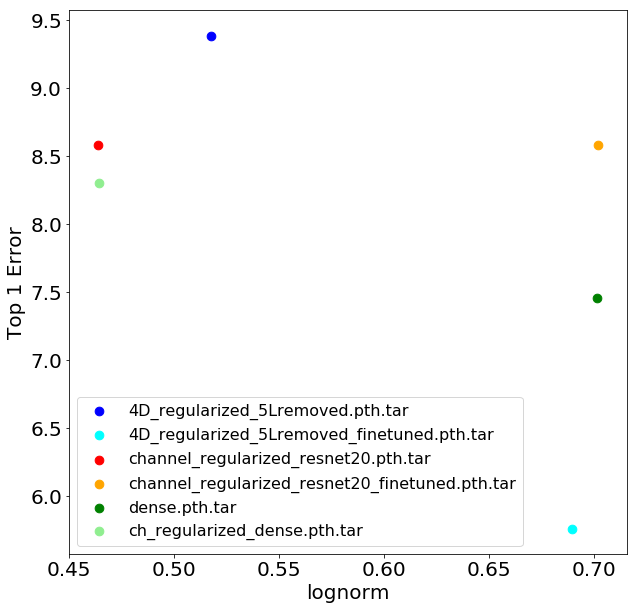

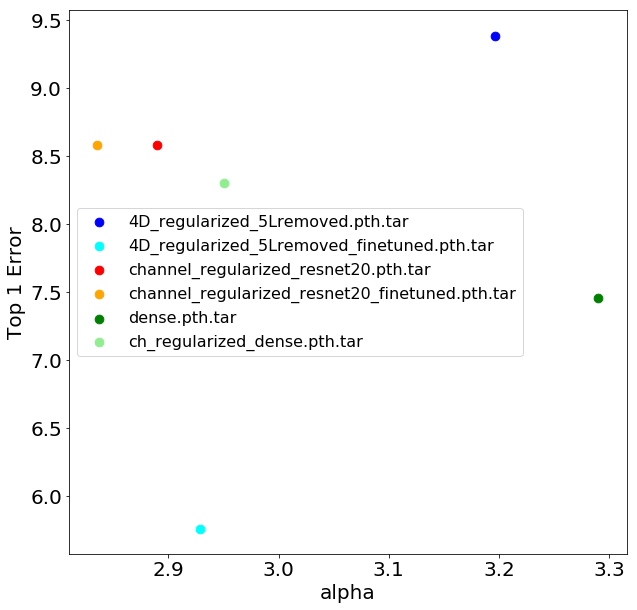

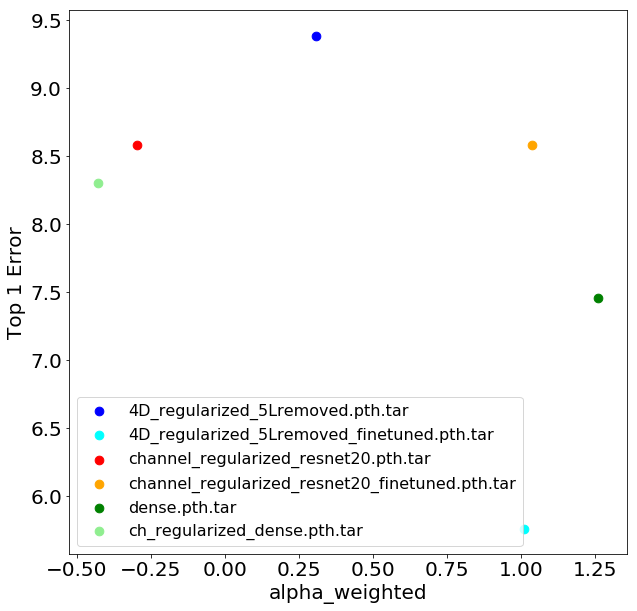

In [9]:
metrics = ['lognorm', 'alpha', 'alpha_weighted'] # 'lambda_max']
colors = ['blue', 'cyan', 'red', 'orange', 'green', 'lightgreen']
for metric in metrics:
    marker_size = 75
    plt.rcParams['figure.figsize'] = [10,10]
    matplotlib.rcParams.update({'font.size': 20})
    legend_prop={'size':16}

    ic = 0
    for file, result in results.items():
        file = file[len("checkpoint_trained_"):]
        plt.scatter(result[metric], 100.0-result['accuracy'], label=file, s=marker_size, color=colors[ic]);
        ic+=1
        
    plt.xlabel(metric)
    plt.ylabel("Top 1 Error")

    plt.legend(prop=legend_prop)

    plt.show();

### Compare layers   (in blue cases)

In [10]:
before_checkpoint = 'checkpoint_trained_4D_regularized_5Lremoved.pth.tar'
after_checkpoint =  'checkpoint_trained_4D_regularized_5Lremoved_finetuned.pth.tar'



try:
    file = before_checkpoint
    logger.info(file)
    checkpoint_file = "/Users/charleshmartin/work/distiller/examples/ssl/checkpoints/"+file

    before_model = create_model(False, 'cifar10', 'resnet20_cifar', parallel=True)
    load_checkpoint(before_model, checkpoint_file);
    
    file = after_checkpoint
    logger.info(file)
    checkpoint_file = "/Users/charleshmartin/work/distiller/examples/ssl/checkpoints/"+file

    after_model = create_model(False, 'cifar10', 'resnet20_cifar', parallel=True)
    load_checkpoint(after_model, checkpoint_file);

except Exception as e:
    print("Did you forget to download the checkpoint file?")
    raise e

INFO:__main__:checkpoint_trained_4D_regularized_5Lremoved.pth.tar
INFO:root:=> creating resnet20_cifar model for CIFAR10
INFO:root:=> loading checkpoint /Users/charleshmartin/work/distiller/examples/ssl/checkpoints/checkpoint_trained_4D_regularized_5Lremoved.pth.tar
INFO:root:=> Checkpoint contents:
╒═══════════════════╤═════════════╤════════════════╕
│ Key               │ Type        │ Value          │
╞═══════════════════╪═════════════╪════════════════╡
│ arch              │ str         │ resnet20_cifar │
├───────────────────┼─────────────┼────────────────┤
│ best_top1         │ float       │ 90.62          │
├───────────────────┼─────────────┼────────────────┤
│ compression_sched │ dict        │                │
├───────────────────┼─────────────┼────────────────┤
│ epoch             │ int         │ 179            │
├───────────────────┼─────────────┼────────────────┤
│ optimizer         │ dict        │                │
├───────────────────┼─────────────┼────────────────┤
│ state_di

In [11]:
import powerlaw
from sklearn.decomposition import TruncatedSVD


Calculating best minimal value for power law fit
Assuming nested distributions
Calculating best minimal value for power law fit
Assuming nested distributions


<class 'distiller.models.cifar10.resnet_cifar.ResNetCifar'>
<class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.batchnorm.BatchNorm2d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.container.Sequential'>
<class 'distiller.models.cifar10.resnet_cifar.BasicBlock'>
<class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.batchnorm.BatchNorm2d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.batchnorm.BatchNorm2d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'distiller.models.cifar10.resnet_cifar.BasicBlock'>
<class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.batchnorm.BatchNorm2d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.batchnorm.BatchNorm2d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'distiller.models.cifar10.resnet_cifar.BasicBlock'>
<class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modu

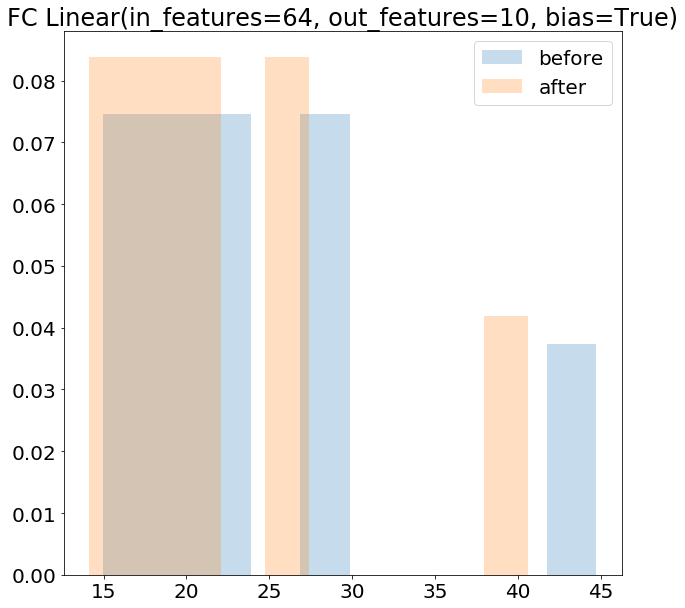

In [12]:
layers_before  = before_model.modules()
layers_after = after_model.modules()

labels = ['before', 'after']
for lb, la in zip(layers_before, layers_after):
    print(type(lb))
    if (type(lb)==torch.nn.modules.linear.Linear):
        print("==========\n",lb)
        for i,l in enumerate([lb, la]):
                         
            W = [np.array(l.weight.data.clone().cpu())][0]
            N, M = np.max(W.shape), np.min(W.shape)
      
            svd = TruncatedSVD(n_components=M-1)        
            svd.fit(W)

            sv = svd.singular_values_
            ev = sv*sv
            max_ev =  np.max(ev)

            plt.hist(ev,  bins=np.min([M,100]),  density=True, alpha=0.25, label=labels[i]);
       
            fit = powerlaw.Fit(ev, xmax=max_ev)
            randP = fit.loglikelihood_ratio('power_law', 'truncated_power_law')
            print("alpha w/xmax ", fit.alpha)
            print("truncated alpha ? ", randP)
            print("alpha log xmax ", fit.alpha*np.log10(max_ev))

          
            print("norm W ", np.linalg.norm(W))
            print("max ev ", max_ev )

        plt.legend()
        plt.title("FC {}".format(l))
        plt.show()

## Comparing the ResNet 4D_regularized before and after finetuning reaults

In [13]:
watcher = ww.WeightWatcher(model=before_model, logger=logger)
before_results = watcher.analyze(compute_alphas=True)
before_summary = watcher.get_summary()

INFO:__main__:
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.3
tensforflow version 1.13.1
keras       version 2.2.4
INFO:__main__:Analyzing model
INFO:__main__:### Printing results ###
INFO:__main__:Norm: min: 0.7295551300048828, max: 7.41560173034668, avg: 4.315795421600342
INFO:__main__:Norm compound: min: 0.8330910801887512, max: 6.924064636230469, avg: 4.315794944763184
INFO:__main__:LogNorm: min: -0.13694187998771667, max: 0.8701463937759399, avg: 0.5175516605377197
INFO:__main__:LogNorm compound: min: -0.08011464774608612, max: 0.8399592638015747, avg: 0.517551600933075
INFO:__main__:Alpha: min: 1.4905332933029465, max: 10.444508466367814, avg: 3.1960536960514463
INFO:__main__:Alpha compound: min: 1.5256003175570632, max: 4.104155632526771, avg: 3.1960536960514467
INFO:__main

In [14]:
watcher = ww.WeightWatcher(model=after_model, logger=logger)
after_results = watcher.analyze(compute_alphas=True)
after_summary = watcher.get_summary()

INFO:__main__:
WeightWatcher v0.1.2 by Calculation Consulting
Analyze weight matrices of Deep Neural Networks
https://calculationconsulting.com/
python      version 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.16.3
tensforflow version 1.13.1
keras       version 2.2.4
INFO:__main__:Analyzing model
INFO:__main__:### Printing results ###
INFO:__main__:Norm: min: 2.5295395851135254, max: 7.477520942687988, avg: 5.17536735534668
INFO:__main__:Norm compound: min: 2.6622424125671387, max: 6.906455993652344, avg: 5.175367832183838
INFO:__main__:LogNorm: min: 0.4030414819717407, max: 0.8737576603889465, avg: 0.6895095109939575
INFO:__main__:LogNorm compound: min: 0.42511019110679626, max: 0.8387784957885742, avg: 0.6895094513893127
INFO:__main__:Alpha: min: 1.5479112500617762, max: 6.215014937360345, avg: 2.9283531958171505
INFO:__main__:Alpha compound: min: 1.5677254210123244, max: 3.484047051467296, avg: 2.9283531958171496
INFO:__main__:

In [15]:
def get_all_metrics(results, metric='norm'):
    all_metrics = []
    for k,v in results.items():
        if 'layer_type' in v:
            for k in v.keys():
                if type(v[k]) is dict:
                    if metric in v[k]:
                        all_metrics.append(v[k][metric])
    return all_metrics

Text(0.5, 1.0, ' ResNet 4D_regularized \n Before vs After Norms')

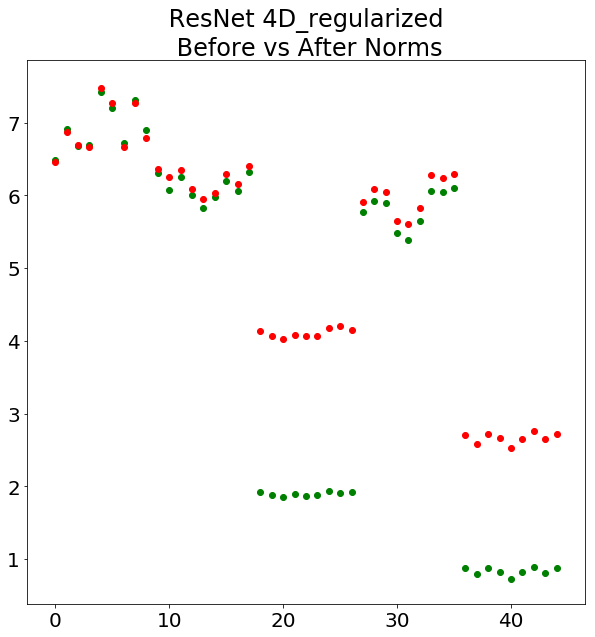

In [16]:
before_metrics = get_all_metrics(before_results)
after_metrics =  get_all_metrics(after_results)

plt.scatter(np.arange(len(before_metrics)), before_metrics, color='green')
plt.scatter(np.arange(len(after_metrics)), after_metrics, color='red')
plt.title(" ResNet 4D_regularized \n Before vs After Norms")

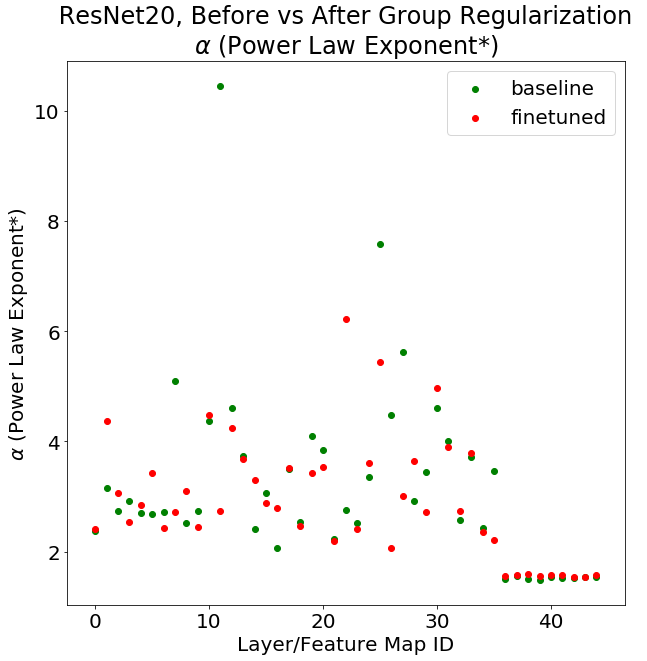

In [23]:
before_metrics = get_all_metrics(before_results, metric='alpha')
after_metrics =  get_all_metrics(after_results, metric='alpha')

plt.scatter(np.arange(len(before_metrics)), before_metrics, color='green', label='baseline')
plt.scatter(np.arange(len(after_metrics)), after_metrics, color='red', label='finetuned')
plt.title(" ResNet20, Before vs After Group Regularization \n"+r"$\alpha$ (Power Law Exponent*)")
plt.xlabel("Layer/Feature Map ID")
plt.ylabel(r"$\alpha$ (Power Law Exponent*)")
plt.legend()
plt.savefig("resnet4d_alphas.png")

In [18]:
!pwd

/Users/charleshmartin/work/weightwatcher/github/weightwatcher


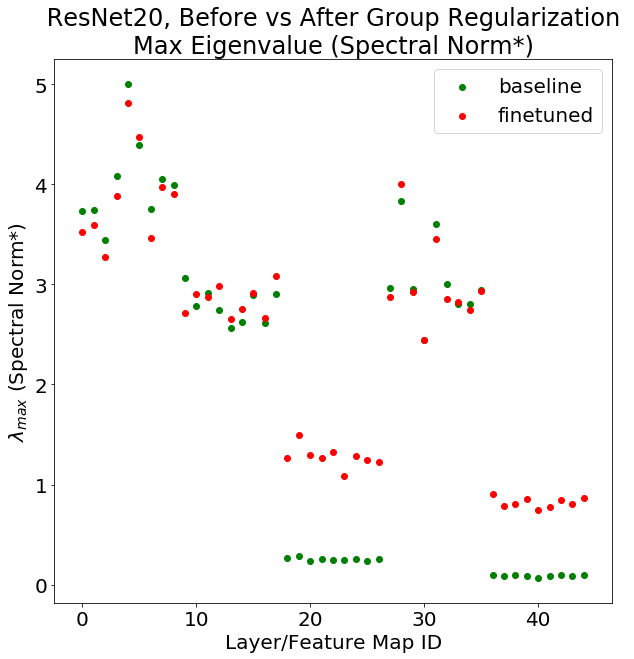

In [24]:
before_metrics = get_all_metrics(before_results, metric='lambda_max')
after_metrics =  get_all_metrics(after_results, metric='lambda_max')

plt.scatter(np.arange(len(before_metrics)), before_metrics, color='green', label='baseline')
plt.scatter(np.arange(len(after_metrics)), after_metrics, color='red', label='finetuned')
plt.title(" ResNet20, Before vs After Group Regularization \nMax Eigenvalue (Spectral Norm*)")
plt.xlabel("Layer/Feature Map ID")
plt.ylabel(r"$\lambda_{max}$ (Spectral Norm*)")
plt.legend()
plt.savefig("resnet4d_maxev.png")

Text(0.5, 1.0, ' ResNet 4D_regularized \n Before vs After Weighted Alpha ')

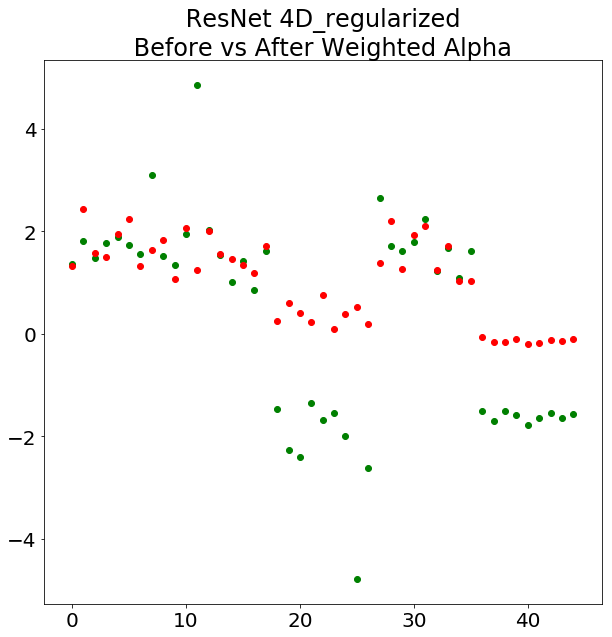

In [20]:
before_metrics = get_all_metrics(before_results, metric='alpha_weighted')
after_metrics =  get_all_metrics(after_results, metric='alpha_weighted')

plt.scatter(np.arange(len(before_metrics)), before_metrics, color='green')
plt.scatter(np.arange(len(after_metrics)), after_metrics, color='red')
plt.title(" ResNet 4D_regularized \n Before vs After Weighted Alpha ")